# 산학과제 1-1
## 데이터 분석
todo 
산학프로젝트명: CMM 을 위한 딥러닝 기반 자동 분류기 개발 ( 1 / 3단계 )
참여자: 최범규, 이성범, 천세진 

프로젝트 배경: 제조산업에서, 생산된 제품의 결함 여부를 판단하는 작업은 매우 중요한 업무중의 하나이다. 전통적인 결함 판단작업은 숙련된 지식의 전문가가 개입됨으로써 높은 비용이 요구되고 시간이 오래 걸리는 작업이었다. 최근, CMM 기계 등장과 함께, 제조 공정은 생산된 제품의 복잡한 형상을 정량적으로 측정할 수 있게 되었다. 게다가, 전문가는 측정된 결과들을 결함을 판단하는데 중요한 근거로 사용하였다. 

- 여전히, 전문가는 수백 만개의 제품에 일일히 대응하여 결합여부를 판단하기 어려울 뿐만 아니라, 
 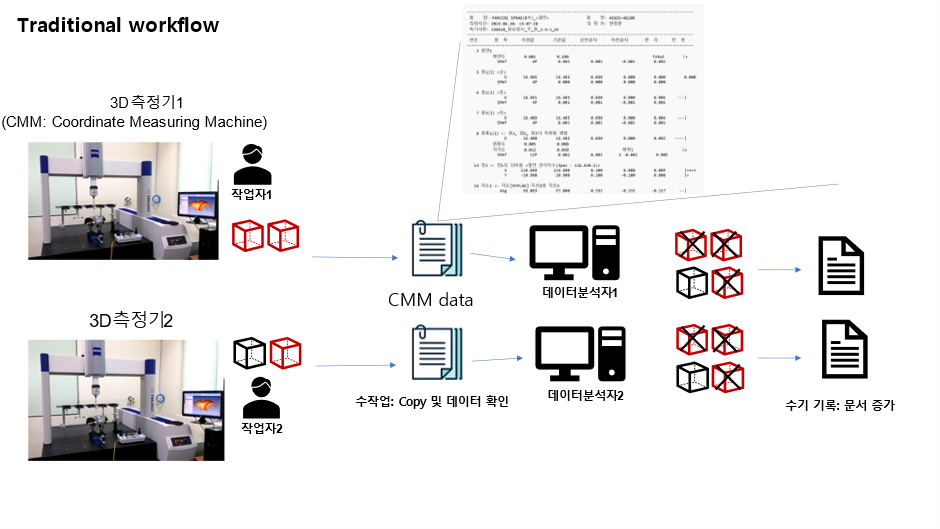
 
 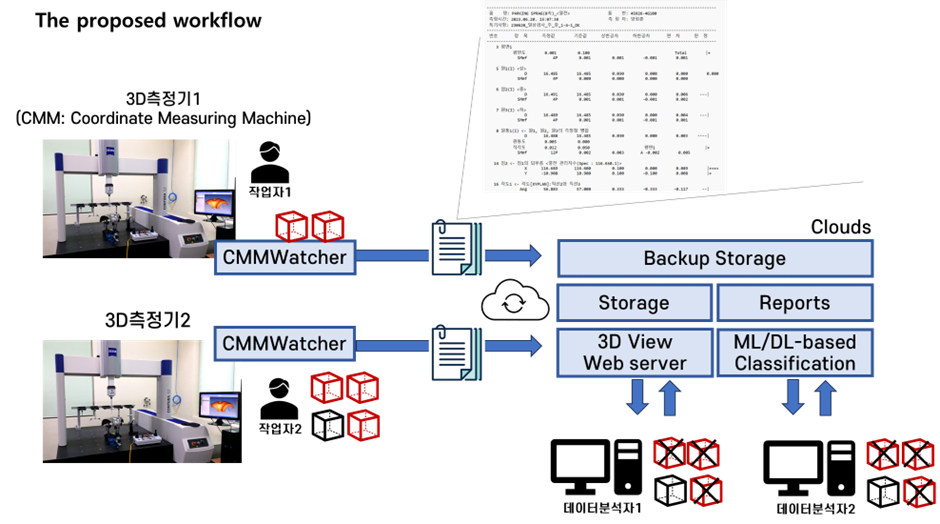
 

본 과제의 과업은:
1) 다음 파일에 대해 딥러닝 기술적용을 위해 2차원 데이터로 변환하는 것이 주된 목표이다. 참고로, 특기사항은 년월일(230620)_[일상검사]_[주]_[중]_[1-4-1]_[OK] 마지막 OK는 최종 완료한 부분이다.
결과물은 데이터 명세서와 변환기, 그리고 출력예시 파일이다.

 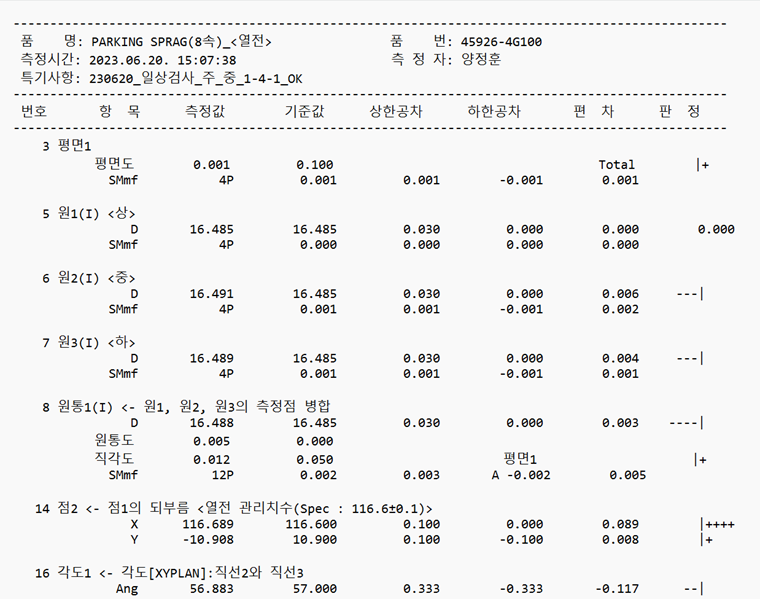


2) 후속 연구방향
+ cmm 데이터를 위한 온톨로지 모델
	+ 참고논문: Ontology development for measurement process and uncertainty of results
+ 딥러닝 기법을 적용하여 분류
	+ 


In [2]:
import os
import csv
import pandas as pd
import sys
import re

In [3]:
dataset_path = os.getcwd() + "\\datasets"
data_list = os.listdir(dataset_path)
data_list

['231005_일상검사_야_종_1-6-1_OK.txt',
 '231005_일상검사_야_중_1-5-1_OK.txt',
 '231005_일상검사_야_초_1-1-1_OK.txt',
 '231005_일상검사_야_초_1-2-1_OK.txt',
 '231005_일상검사_야_초_1-3-1_OK.txt',
 '231005_일상검사_야_초_1-4-1_OK.txt',
 '231005_일상검사_야_초_1-5-1_NG.txt',
 '231005_일상검사_야_초_1-6-1_OK.txt',
 '231006_일상검사_주_초_1-1-1_.txt',
 '231006_일상검사_주_초_2-1-1_NG.txt',
 '231006_일상검사_주_초_2-2-1_NG.txt']

In [3]:
with open(dataset_path + "\\" + data_list[0],'r',encoding='EUC-KR') as f:
    data = f.readlines()

In [4]:
data

['-------------------------------------------------------------------------------------------------\n',
 ' 품    명: PARKING SPRAG(8속)_<열전>                품    번: 45926-4G100\n',
 ' 측정시간: 2023.10.06. 05:23:36                     측 정 자: 양정훈\n',
 ' 특기사항: 231005_일상검사_야_종_1-6-1_OK\n',
 '-------------------------------------------------------------------------------------------------\n',
 ' 번호       항  목      측정값        기준값      상한공차      하한공차       편  차      판  정\n',
 '-------------------------------------------------------------------------------------------------\n',
 '    3 평면1\n',
 '           평면도        0.002         0.100                                    Total        |+   \n',
 '             SMmf           4P         0.001         0.001        -0.001        0.002\n',
 '\n',
 '    5 원1(I) <상>\n',
 '                D       16.499        16.485         0.030         0.000        0.014       -|    \n',
 '             SMmf           4P         0.000         0.000         0.000        0.00

### Header 정보 추출

품명, 품번, 측정시간, 측정자, 특이사항등 데이터 파싱

In [5]:
header_info = {
    "품명": data[1].split("품    명:")[1].split("품    번:")[0].strip(),
    "품번": data[1].split("품    번:")[1].strip(),
    "측정시간": data[2].split("측정시간:")[1].split("측 정 자:")[0].strip(),
    "측정자": data[2].split("측 정 자:")[1].strip(),
    "특기사항": data[3].split(":")[1].strip(),
    "검사형태": data[3].split("_")[1].strip(),
    "검사시간대": data[3].split("_")[2].strip()+"간",
    "초중종믈 검사": data[3].split("_")[3].strip()+"물",
    "품질상태": data[3].split("_")[-1].strip()  
}

header_info

{'품명': 'PARKING SPRAG(8속)_<열전>',
 '품번': '45926-4G100',
 '측정시간': '2023.10.06. 05:23:36',
 '측정자': '양정훈',
 '특기사항': '231005_일상검사_야_종_1-6-1_OK',
 '검사형태': '일상검사',
 '검사시간대': '야간',
 '초중종믈 검사': '종물',
 '품질상태': 'OK'}

### 데이터 처리부분

In [7]:
from  extract_dataframe_from_file import extract_dataframe_from_file


df = extract_dataframe_from_file(dataset_path+"\\"+data_list[0])
df

,품명,품번,측정시간,측정자,검사형태,검사시간대,종믈검사,번호,도형,항목,측정값,기준값,상한공차,하한공차,편차,판정,품질상태
0,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,3,평면1,평면도,0.002,0.100,-,-,-,|+,OK
1,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,3,평면1,SMmf,4P,0.001,0.001,-0.001,0.002,-,OK
2,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,5,원1(I) <상>,D,16.499,16.485,0.030,0.000,0.014,-|,OK
3,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,5,원1(I) <상>,SMmf,4P,0.000,0.000,0.000,0.001,-,OK
4,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,6,원2(I) <중>,D,16.482,16.485,0.030,0.000,-0.003,-0.003,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,80,점30 <- 점18의 되부름 <소재원점>,X,72.933,72.870,0.100,-0.030,0.063,|++,OK
69,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,80,점30 <- 점18의 되부름 <소재원점>,Y,-2.367,-2.300,0.100,-0.100,0.067,|+++,OK
70,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,81,직선25 <- 직선18의 되부름,X/Y,-14.633,-14.500,0.500,-0.500,0.133,|++,OK
71,PARKING SPRAG(8속)_<열전>,45926-4G100,2023.10.06. 05:23:36,양정훈,일상검사,야간,종물,82,직선26 <- 직선16의 되부름,X/Y,14.509,14.500,0.500,-0.500,0.009,|+,OK


## 처리 및 데이터 저장

In [4]:
os.getcwd()

'c:\\git_folder\\CMM_DeepLearning_Module\\references\\천세진 교수님 멘토링 자료\\CMM_analysis'

In [5]:
output_path = (os.getcwd()+'\\output\\')
print(os.path.exists(output_path))
if os.path.exists(output_path) is True:
    pass
else:
    os.mkdir(os.getcwd()+"\\"+"output")

True


In [8]:
for item in data_list:
    df = extract_dataframe_from_file(dataset_path+"\\"+item)
    df.to_csv(path_or_buf=output_path+item[:-4]+".csv",encoding='cp949')